### 02-3 기초적인 통계 계산하기

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')

In [4]:
df.head(n=10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


* 그룹화한 데이터의 평균 구하기

In [6]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [7]:
grouped_year_df = df.groupby('year')
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [8]:
grouped_year_df

In [9]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [10]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [12]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [14]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### 02-4 그래프 그리기

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
global_yearly_life_expectancy

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<AxesSubplot:xlabel='year'>

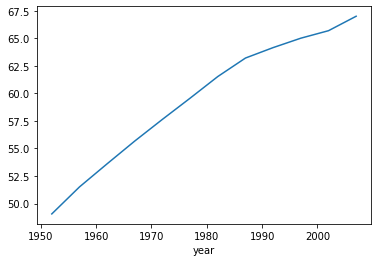

In [18]:
global_yearly_life_expectancy.plot()

## 03 판다스 데이터프레임과 시리즈
### 03-1 나만의 데이터 만들기
* 시리즈와 데이터프레임 직접 만들기

In [20]:
import pandas as pd
s = pd.Series(['banana', 42])
print(s)

0    banana
1        42
dtype: object


In [21]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'])
print(s)

0         Wes McKinney
1    Creator of Pandas
dtype: object


In [22]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'], index=['Person', 'Who'])
print(s)

Person         Wes McKinney
Who       Creator of Pandas
dtype: object


In [24]:
scientists = pd.DataFrame({
    'Name': ['Rosaline Franklin', 'William Gosset'],
    'Occupation': ['Chemist', 'Statistician'],
    'Born': ['1920-07-25', '1876-06-13'],
    'Died': ['1958-04-16', '1937-10-16'],
    'Age': [37, 61]
})
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [25]:
scientists = pd.DataFrame(
    data={
        'Occupation': ['Chemist', 'Statistician'],
        'Born': ['1920-07-25', '1876-06-13'],
        'Died': ['1958-04-16', '1937-10-16'],
        'Age': [37, 61]
    },
    index=['Rosaline Franklin', 'William Gosset'],
    columns=['Occupation', 'Born', 'Age', 'Died']
)
print(scientists)

                     Occupation        Born  Age        Died
Rosaline Franklin       Chemist  1920-07-25   37  1958-04-16
William Gosset     Statistician  1876-06-13   61  1937-10-16


In [26]:
from collections import OrderedDict

scientists = pd.DataFrame(OrderedDict([
    ('Name', ['Rosaline Franklin', 'William Gosset']),
    ('Occupation', ['Chemist', 'Statistician']),
    ('Born', ['1920-07-25', '1876-06-13']),
    ('Age', [37, 61])
]))

print(scientists)

                Name    Occupation        Born  Age
0  Rosaline Franklin       Chemist  1920-07-25   37
1     William Gosset  Statistician  1876-06-13   61


### 03-2 시리즈 다루기 - 기초
* 데이터푸레임에서 시리즈 선택하기

In [28]:
scientists = pd.DataFrame(
    data={
        'Occupation': ['Chemist', 'Statistician'],
        'Born': ['1920-07-25', '1876-06-13'],
        'Died': ['1958-04-16', '1937-10-16'],
        'Age': [37, 61]
    },
    index=['Rosaline Franklin', 'William Gosset'],
    columns=['Occupation', 'Born', 'Died', 'Age']
)

In [29]:
first_row = scientists.loc['William Gosset']
print(type(first_row))

<class 'pandas.core.series.Series'>


In [30]:
print(first_row)

Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object


* 시리즈 속성과 메서드 사용하기 - index, values, keys

In [32]:
print(first_row.index)

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')


In [33]:
print(first_row.values)

['Statistician' '1876-06-13' '1937-10-16' 61]


In [34]:
print(first_row.keys())

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')


In [35]:
print(first_row.index[0])

Occupation


In [36]:
print(first_row.keys()[0])

Occupation


* 시리즈의 기초 통계 메서드 사용하기

In [38]:
ages = scientists['Age']
print(ages)

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64


In [39]:
print(ages.mean())

49.0


In [40]:
print(ages.min())

37


In [41]:
print(ages.max())

61


In [42]:
print(ages.std())

16.97056274847714


* 시리즈 메서드 정리
    * append - 2개 이상의 시리즈 연결
    * describe - 요약 통계량 계산
    * drop_duplicates - 중복값이 없는 시리즈 반환
    * equals - 시리즈에 해당 값을 가진 요소가 있는지 확인
    * get_values - 시리즈 값 구하기 (values 속성과 동일)
    * isin - 시리즈에 포함된 값이 있는지 확인
    * min - 최솟값 반환
    * max - 최댓값 반환
    * mean - 산술 평균 반환
    * median - 중간값 반환
    * replace - 특정 값을 가진 시리즈 값을 교체
    * sample - 시리즈에서 임의의 값을 반환
    * sort_values - 값을 정렬
    * to_frame - 시리즈를 데이터프레임으로 변환